# Effects of Ford GoBike Trip Characteristics on Their Duration

**by Amanda Zhou** <br>
**September 05, 2020**

## Investigation Overview

In this investigation, I wanted to look at the characteristics of trips that could be used to predict their duration. The main focus was on the three factors of trips: User Type, Start Time (includes Hour of the Day and Day of the Week), and Distance (based on Start and End Station's latitude and longitude).



## Dataset Overview

This data set includes information about 192,082 individual rides made in a bike-sharing system covering the greater San Francisco Bay area for January 2019. 248 data points were removed from the analysis due to inconsistencies or missing information. Below are the attributes of each trip. I will extract the hours and days from Start Time, and caculate the trip distance based on its start and end station's latitude and longitude. 

Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (“Subscriber” = Member or “Customer” = Casual)
- Bike Share for All Trip

## Table of Contents
- [Preliminary Wrangling](#pw)
- [Univariate Exploration](#ue)
- [Bivariate Exploration](#be)
- [Multivariate Exploration](#me)


<a id='pw'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201901-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [3]:
# high-level overview of data shape and composition
df.shape

(192082, 14)

In [4]:
# check duplicated entries
df.duplicated().sum()

0

In [5]:
# check missing values
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           248
start_station_name         248
start_station_latitude       0
start_station_longitude      0
end_station_id             248
end_station_name           248
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

In [6]:
# drop rows that contain null
df = df.dropna()
df = df.reset_index(drop=True)

In [7]:
# check if have any null values again -> should be all 0s
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191834 entries, 0 to 191833
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             191834 non-null  int64  
 1   start_time               191834 non-null  object 
 2   end_time                 191834 non-null  object 
 3   start_station_id         191834 non-null  float64
 4   start_station_name       191834 non-null  object 
 5   start_station_latitude   191834 non-null  float64
 6   start_station_longitude  191834 non-null  float64
 7   end_station_id           191834 non-null  float64
 8   end_station_name         191834 non-null  object 
 9   end_station_latitude     191834 non-null  float64
 10  end_station_longitude    191834 non-null  float64
 11  bike_id                  191834 non-null  int64  
 12  user_type                191834 non-null  object 
 13  bike_share_for_all_trip  191834 non-null  object 
dtypes: f

In [9]:
# convert start_time and end_time into datetime type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert start_station_id and end_station_id  into int data types
df.start_station_id = df.start_station_id.astype('int')
df.end_station_id = df.end_station_id.astype('int')
df.bike_id = df.bike_id.astype('int')

# convert user_type into categorical type
df.user_type = df.user_type.astype('category')

In [10]:
# check dataset after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191834 entries, 0 to 191833
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             191834 non-null  int64         
 1   start_time               191834 non-null  datetime64[ns]
 2   end_time                 191834 non-null  datetime64[ns]
 3   start_station_id         191834 non-null  int64         
 4   start_station_name       191834 non-null  object        
 5   start_station_latitude   191834 non-null  float64       
 6   start_station_longitude  191834 non-null  float64       
 7   end_station_id           191834 non-null  int64         
 8   end_station_name         191834 non-null  object        
 9   end_station_latitude     191834 non-null  float64       
 10  end_station_longitude    191834 non-null  float64       
 11  bike_id                  191834 non-null  int64         
 12  user_type       

In [11]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,191834.000000,191834.000000,191834.000000,191834.000000,191834.000000,191834.000000,191834.000000,191834.000000
mean,750.258635,132.841639,37.773916,-122.358361,131.218700,37.774047,-122.357959,4028.841321
std,1670.124794,109.662417,0.090521,0.108502,109.546275,0.090420,0.108087,1572.295525
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,333.000000,43.000000,37.770407,-122.412408,41.000000,37.771058,-122.411726,3085.000000
50%,528.000000,98.000000,37.781010,-122.398525,95.000000,37.781010,-122.398436,4749.000000
75%,821.000000,211.000000,37.795913,-122.294837,203.000000,37.797280,-122.294837,5173.000000
max,84002.000000,385.000000,37.880222,-121.874119,385.000000,37.880222,-121.874119,6638.000000


In [12]:
# rename dataset
rides = df

<a id='ue'></a>
## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: trip duration (duration_sec).

## Distribution of Trip Duration

Trip Duration in the dataset has a large number of trips are less than 2000 seconds, which is approximately 180,000. Plotted on a logarithmic scale, the distribution of trip duration clearly looks right-skewed, with a peak between 400 and 600 seconds. After the peak, at around 1500 seconds, the number of trips are dropping considerably.

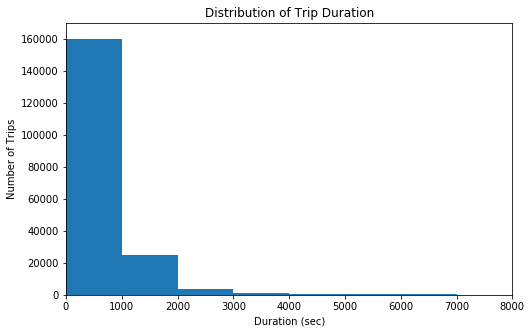

In [13]:
# start with a standard-scaled plot
binsize = 1000
bins = np.arange(0, rides['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Duration')
plt.axis([0, 8000, 0, 170000])
plt.show();

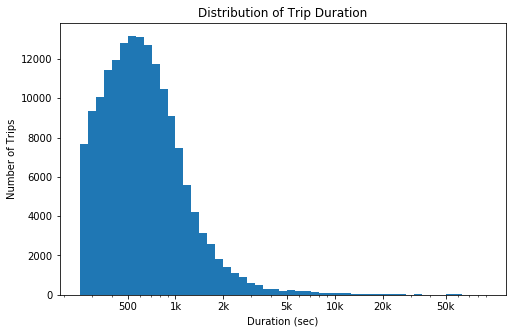

In [14]:
# there's a tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(rides['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_sec', bins = log_bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Duration')
plt.show();

In [15]:
# extract 'hour of the day' and 'day of the week' from 'start_time'
rides['hour_of_day'] = rides['start_time'].dt.hour
rides['day_of_week'] = rides['start_time'].dt.day_name()

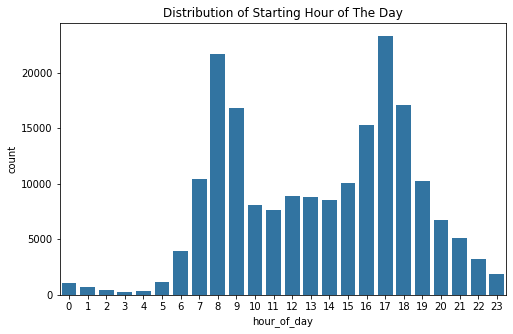

In [16]:
# create the plot for the 'hour of day' of starting time of each trip
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

sb.countplot(data=rides, x='hour_of_day', color=base_color)
plt.title("Distribution of Starting Hour of The Day");

- **There are two peaks people use Ford GoBike the most during the day. One is from 7 to 9 am, another is from 4 to 6 pm.**
- **These two periods are rush hours that people commute to work, school or home.**

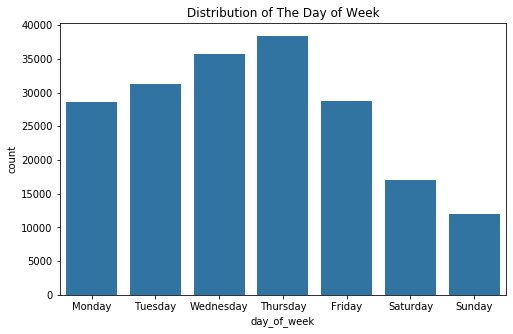

In [17]:
# create the plot for the 'day_of_week' of starting time of each trip
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = day_order)
df['day_of_week'] = df['day_of_week'].astype(ordered_cat)

sb.countplot(data=rides, x='day_of_week', color=base_color)
plt.title("Distribution of The Day of Week");

- **It is quite clear to see that the usage amount of Ford GoBike during weekdays is much higher than during weekend.**
- **Interestingly, the peak usage is on Thursday.**
- **The number of usage is gradually increasing from Monday till Thursday, after that, it is dropping markedly.**

Then, I'll calculate and analyze the trip distance in the dataset.

In [18]:
# calculate the trip distance between start and end stations

from math import sin, cos, sqrt, atan2, radians

def distance_calculation(i):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(i.start_station_latitude)
    lon1 = radians(i.start_station_longitude)
    lat2 = radians(i.end_station_latitude)
    lon2 = radians(i.end_station_longitude)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [19]:
# create trip distance column
rides['distance_km'] = rides.apply(lambda i: distance_calculation(i), axis=1)

# keep two decimal places 
rides['distance_km'] = [ '%.2f' % elem for elem in rides['distance_km']]

# convert into float type
rides['distance_km'] = [float(item) for item in rides['distance_km']]

In [20]:
# drop unnecessary columns: start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude
rides.drop (['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)


In [21]:
# check changes
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,hour_of_day,day_of_week,distance_km
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,196,Grand Ave at Perkins St,4861,Subscriber,No,17,Thursday,5.31
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,134,Valencia St at 24th St,5506,Subscriber,No,20,Thursday,3.86
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,157,65th St at Hollis St,2717,Customer,No,18,Thursday,3.29
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,53,Grove St at Divisadero,4557,Customer,No,19,Thursday,1.00
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,28,The Embarcadero at Bryant St,2100,Customer,No,14,Thursday,0.95


In [22]:
rides.describe()

,duration_sec,start_station_id,end_station_id,bike_id,hour_of_day,distance_km
count,191834.000000,191834.000000,191834.000000,191834.000000,191834.000000,191834.000000
mean,750.258635,132.841639,131.218700,4028.841321,13.500250,1.698282
std,1670.124794,109.662417,109.546275,1572.295525,4.768237,1.104061
min,61.000000,3.000000,3.000000,11.000000,0.000000,0.000000
25%,333.000000,43.000000,41.000000,3085.000000,9.000000,0.910000
50%,528.000000,98.000000,95.000000,4749.000000,14.000000,1.440000
75%,821.000000,211.000000,203.000000,5173.000000,17.000000,2.240000
max,84002.000000,385.000000,385.000000,6638.000000,23.000000,61.280000


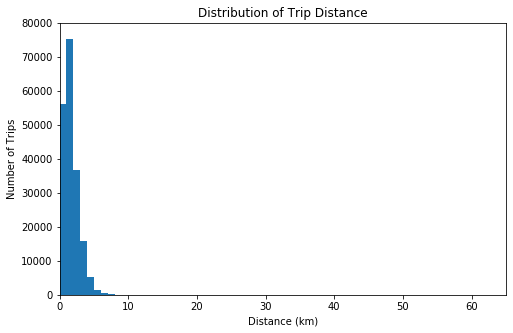

In [23]:
# plotting trip distance on a standard scale
binsize = 1
bins = np.arange(0, rides['distance_km'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'distance_km', bins = bins)
plt.xlabel('Distance (km)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Distance')
plt.axis([0, 65, 0, 80000])
plt.show();

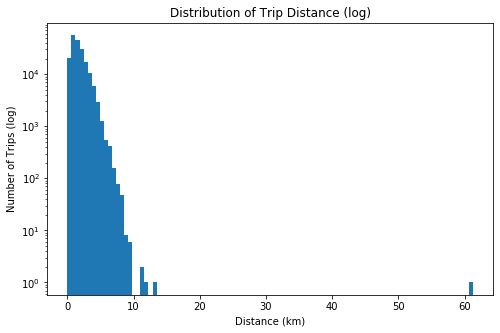

In [24]:
# plotting trip distance on a log scale
plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'distance_km', bins = 100, log=True)
plt.xlabel('Distance (km)')
plt.ylabel('Number of Trips (log)')
plt.title('Distribution of Trip Distance (log)')
plt.show();

- **Trip distance has a right-skewed distribution, with most trips are less than 10 km, and very few have further distance.**
- **After plotting on a log-scale, the trip duration distribution clearly looks right-skewed too, with some outliers between 10 - 15 km and over 60km.**

I'll now look at the other features in the data to see if any of them hold interesting properties, i.e. start_station_id, end_station_id, and bike_share_for_all_trip.

<a id='be'></a>
## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between different variables in the data.

## Trip Duration vs User Type
From below two voilin plots, on average, we can see that subscribers spent less time than customers on each trip.

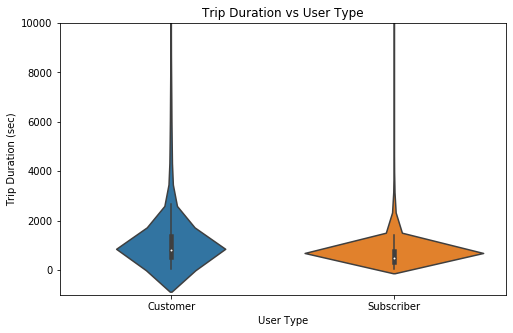

In [25]:
# User Type and Duration plot
plt.figure(figsize=[8, 5])
sb.violinplot(data = rides, x = 'user_type', y = 'duration_sec')
plt.ylim([-1000, 10000])
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.title('Trip Duration vs User Type')
plt.show();

## Trip Duration vs Hour of The Day

Interestingly, it shows that trip duration reaches the first peak at about 1750 seconds between 0-3 am time period, then the second peak at about 900 seconds around 2pm. During the busy hours, the average trip duration is pretty low, which is about 550 seconds.

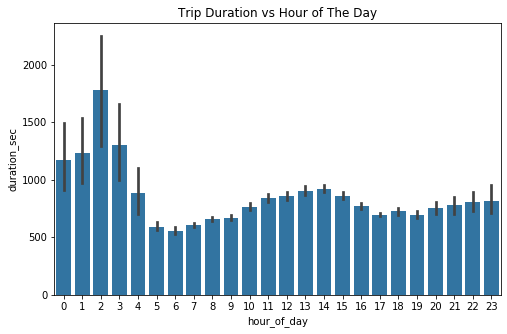

In [26]:
# Trip Duration vs Hour of The Day plot
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.barplot(data=rides, x='hour_of_day',y='duration_sec', color = base_color).set_title('Trip Duration vs Hour of The Day');


## Trip Duration vs Day of The Week

From Monday to Friday, the trip duration are basically flat, which are 500 seconds on average. Saturday and Sunday are obviously higher, which is between 600 - 1000 seconds.

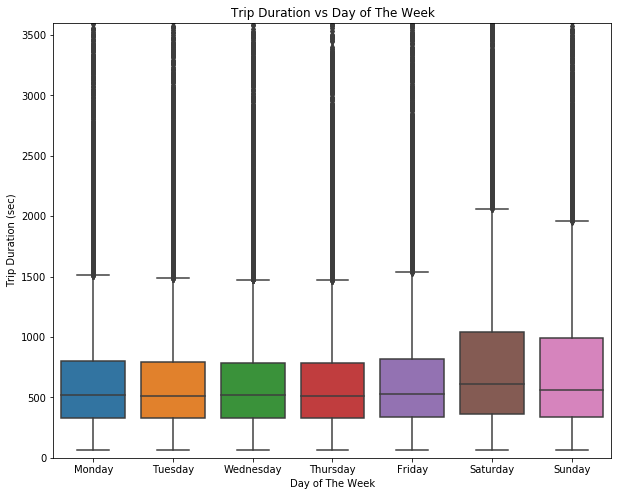

In [27]:
# Trip Duration vs Day of The Week plot
plt.figure(figsize=[10, 8])
sb.boxplot(data = rides, x = 'day_of_week', y = 'duration_sec')
plt.ylim([0, 3600])
plt.xlabel('Day of The Week')
plt.ylabel('Trip Duration (sec)')
plt.title('Trip Duration vs Day of The Week')
plt.show();

## Trip Duration vs Trip Distance
By looking at the chart below, it doesn't see trip distance and its duration have a strong correlation. However, it does show that majority of trips are within 10 km and 3000 seconds.

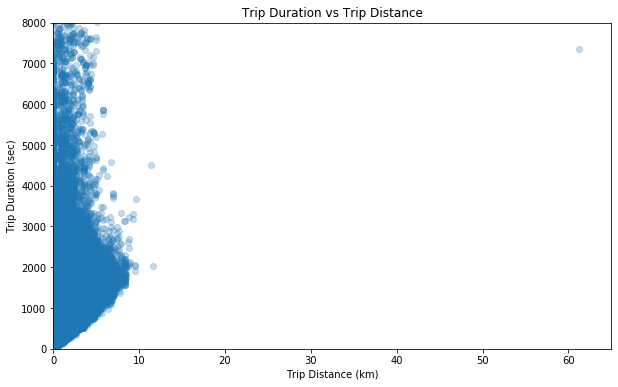

In [28]:
# Trip Duration vs Trip Distance plot
plt.figure(figsize=[10, 6])
plt.scatter(data = rides, x = 'distance_km', y = 'duration_sec', alpha = 0.25)
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (sec)')
plt.title('Trip Duration vs Trip Distance')
plt.axis([0, 65, 0, 8000]);

<a id='me'></a>
## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the two categorical measures of
user type play into the relationship between trip duration, hour of the day, and day of the week.

## Trip Duration vs Hour of The Day vs User Type

- The change in Subscriber seems to be fairly smooth over time, but the change in Customer is jerkier.
- There are three peaks that having longer time duration in Customer, which are 2-3 am, 1pm, and 10pm.
- Only one peak having longer time duration in Subscriber, which is around 2am.

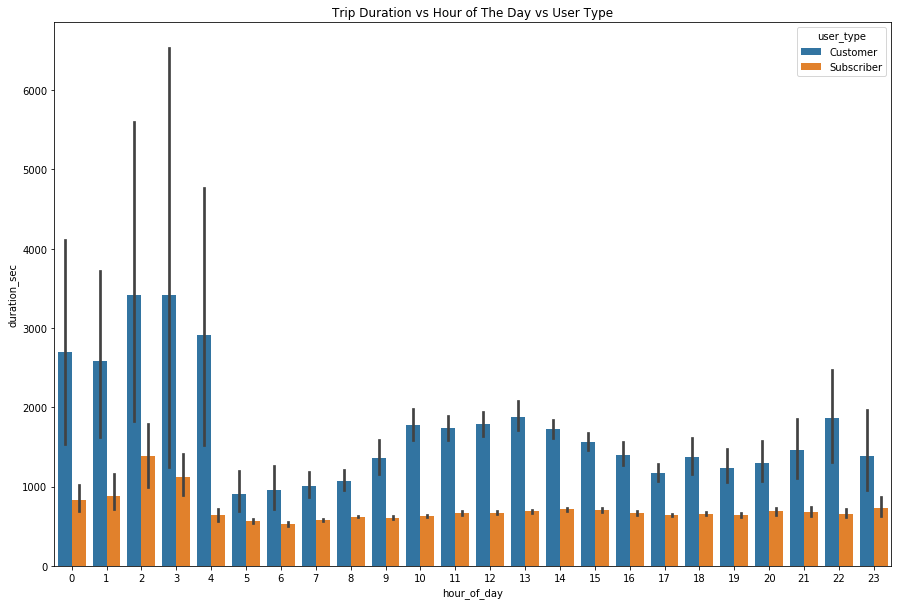

In [29]:
plt.figure(figsize = [15, 10])
sb.barplot(data = rides, x = 'hour_of_day', y = 'duration_sec', hue = 'user_type')
plt.title('Trip Duration vs Hour of The Day vs User Type');

## Trip Duration vs Day of The Week vs User Type

- The time duration in Customer goes small ups and downs frequently during the week and reaches a peak on Saturday while there is no big overall changes in Subscriber.
- Both users have the highest average of time duration in the weekend.

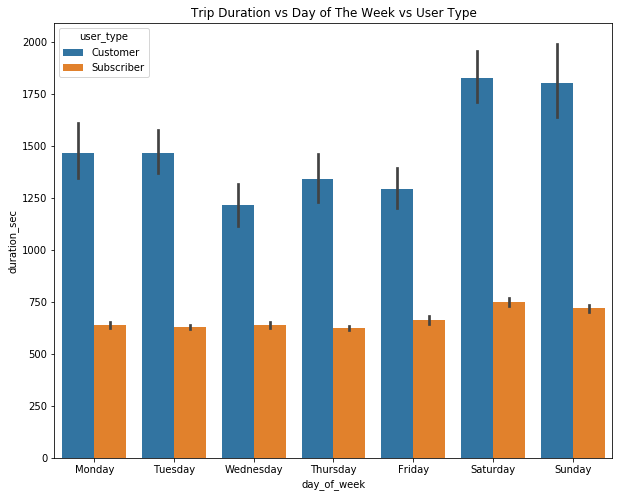

In [30]:
plt.figure(figsize = [10, 8])
sb.barplot(data = rides, x = 'day_of_week', y = 'duration_sec', hue = 'user_type')
plt.title('Trip Duration vs Day of The Week vs User Type');

## Hour of The Day vs Day of The Week vs User Type

- It is most likely that customers use bike share during weekeend afternoon, especially on Saturday, even they also use it pretty much during busy hours in weekdays.
- Subscribers use bike share a lot during rush hours in weekdays and not much in the weekend.
- Customers use bike share much more during weekend than subscribers, probably for the purpose of entertainment, and their trip durations are longer than other days.


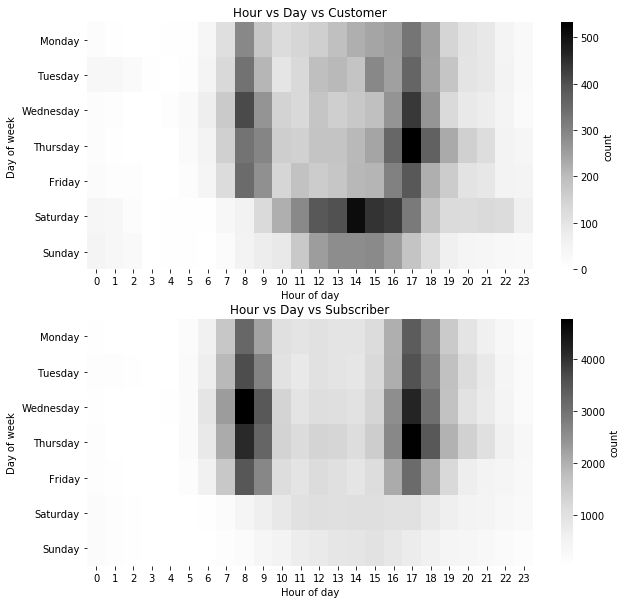

In [31]:
# count number for Customer
customer = rides.query('user_type == "Customer"').groupby(['day_of_week', 'hour_of_day']).size()
customer = customer.reset_index(name='count')
customer = customer.pivot(index='day_of_week', columns='hour_of_day', values='count')

# count number for Subscriber
subscriber = rides.query('user_type == "Subscriber"').groupby(['day_of_week', 'hour_of_day']).size()
subscriber = subscriber.reset_index(name='count')
subscriber = subscriber.pivot(index='day_of_week', columns='hour_of_day', values='count')

# plot both data
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sb.heatmap(customer, cmap='Greys', cbar_kws = {'label' : 'count'})
plt.title('Hour vs Day vs Customer')
plt.xlabel('Hour of day')
plt.ylabel('Day of week');

plt.subplot(2, 1, 2)
sb.heatmap(subscriber, cmap='Greys', cbar_kws = {'label' : 'count'})
plt.title('Hour vs Day vs Subscriber')
plt.xlabel('Hour of day')
plt.ylabel('Day of week');

## Conclusion
1. On average, customers spent more time than subscribers on each trip.
2. Trip duration in 0-3 am time period is longer than other hours of the day for both users. 
3. Subscribers use bike share a lot during rush hours in weekdays and not much in the weekend.
4. Customers use bike share much more during weekend, especially on Saturday afternoon, probably for the purpose of entertainment, and their trip durations are longer than other days.
5. Trip distance doesn't have a strong correlation with its duration.

## Thank You!!